### PCA for BreastCancer Dataset (Wisconsin)
##### Author: José Manuel García Nieto 20/02/2024

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 
%matplotlib inline

In [2]:
# Load data.
data = load_breast_cancer()

In [3]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
df_features = pd.DataFrame(data=X,columns=data['feature_names'])

In [5]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df_features.shape

(569, 30)

#### Standardize the data of the features

In [7]:
standardized = StandardScaler()

In [8]:
standardized.fit(df_features)

StandardScaler()

In [9]:
scaled_data = standardized.transform(df_features)

In [10]:
print(scaled_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


##### 3 principal components decomposition of the 30 features

In [11]:
pca = PCA(n_components=3)

In [12]:
pca.fit(scaled_data)

PCA(n_components=3)

In [13]:
x_pca = pca.transform(scaled_data)

In [14]:
scaled_data.shape

(569, 30)

In [15]:
# Each column is a principal component
x_pca.shape

(569, 3)

#### Series of the diagnosis value

In [16]:
df_diag= pd.Series(data['target'])
df_diag.value_counts()

1    357
0    212
Name: count, dtype: int64

#### plot the principal components to see the relations

In [17]:
x_pca[:1]

array([[ 9.19283683,  1.94858307, -1.12316616]])

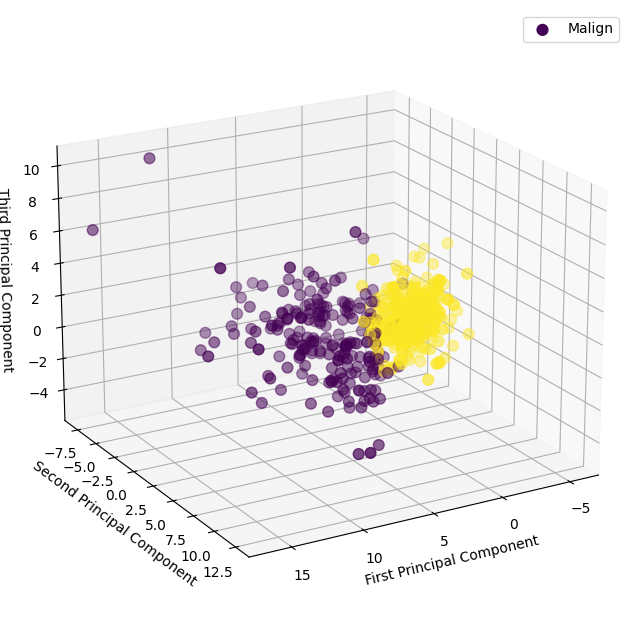

In [18]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(20, 60)
plt.show()

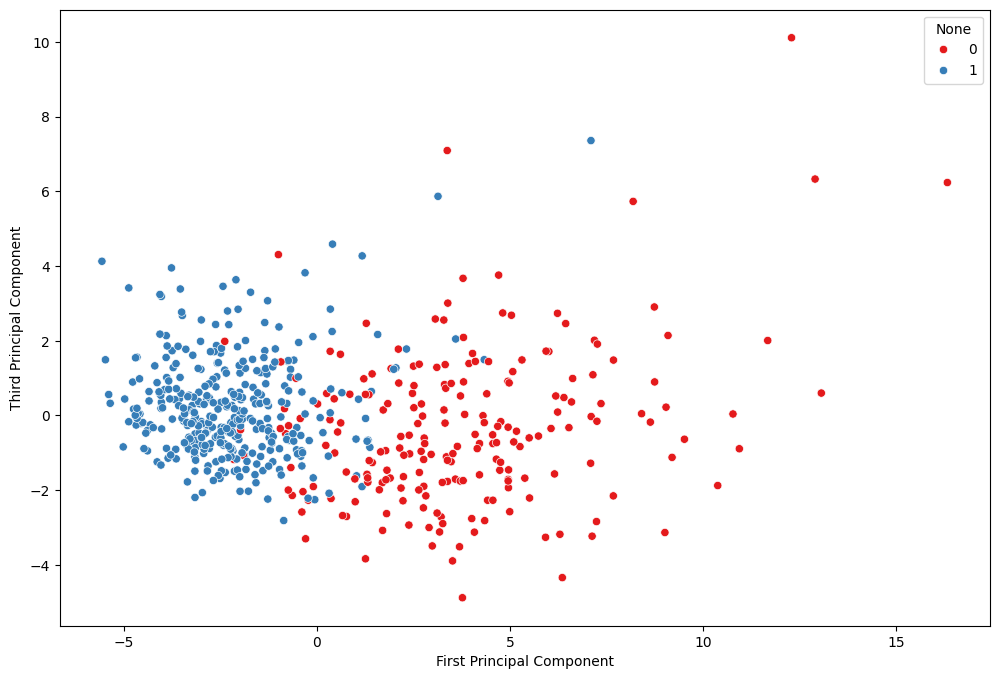

In [19]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,2],hue=df_diag, palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.show()

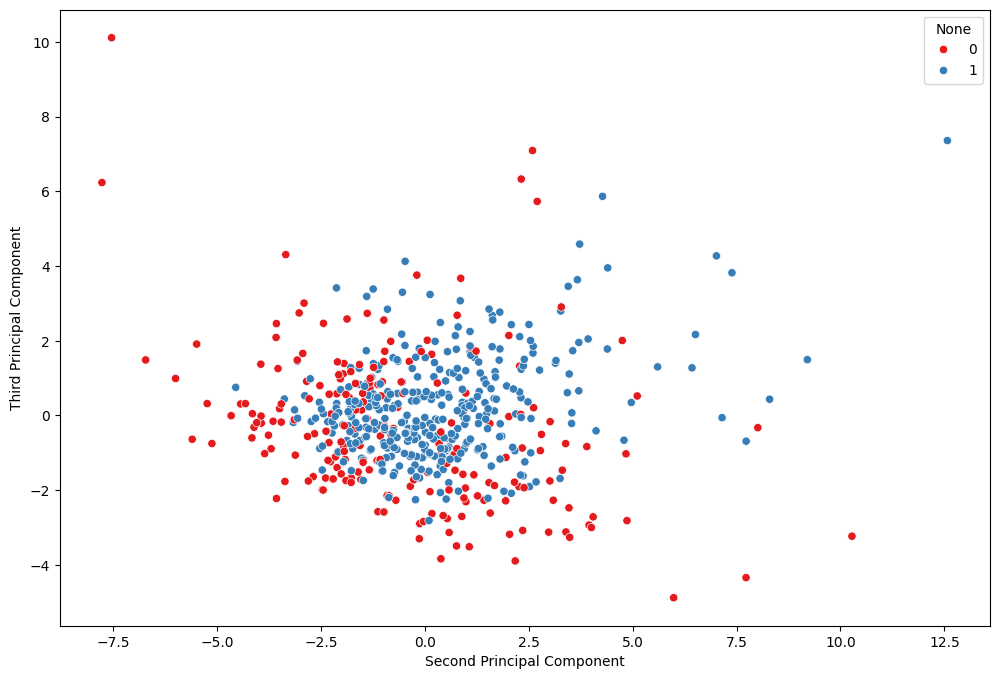

In [20]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,1], y=x_pca[:,2],hue=df_diag, palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.show()

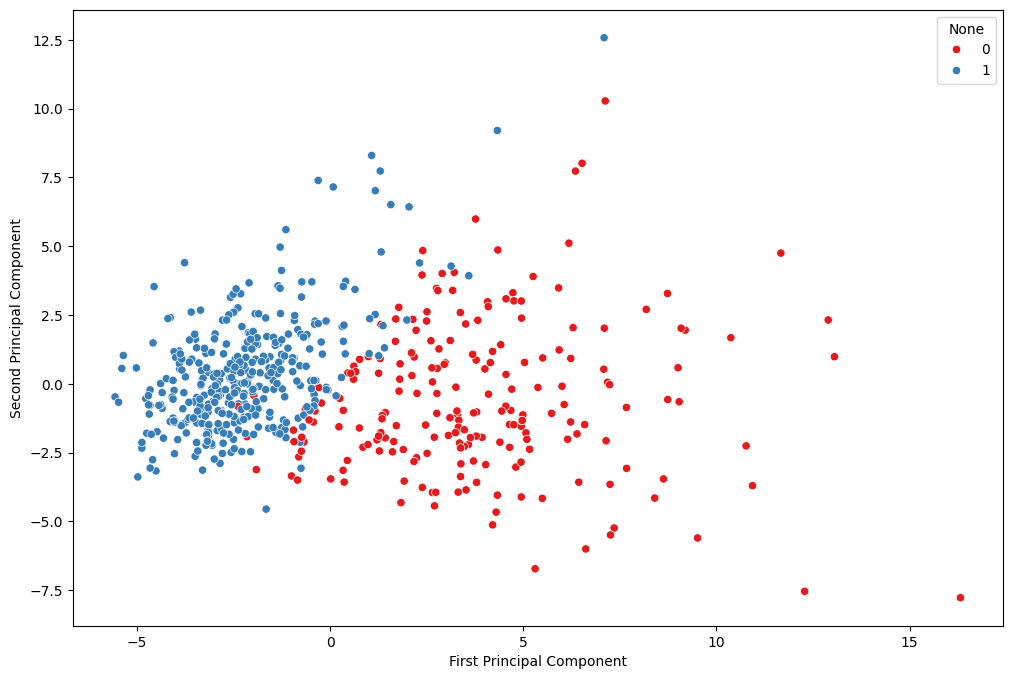

In [21]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1],hue=df_diag, palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [22]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

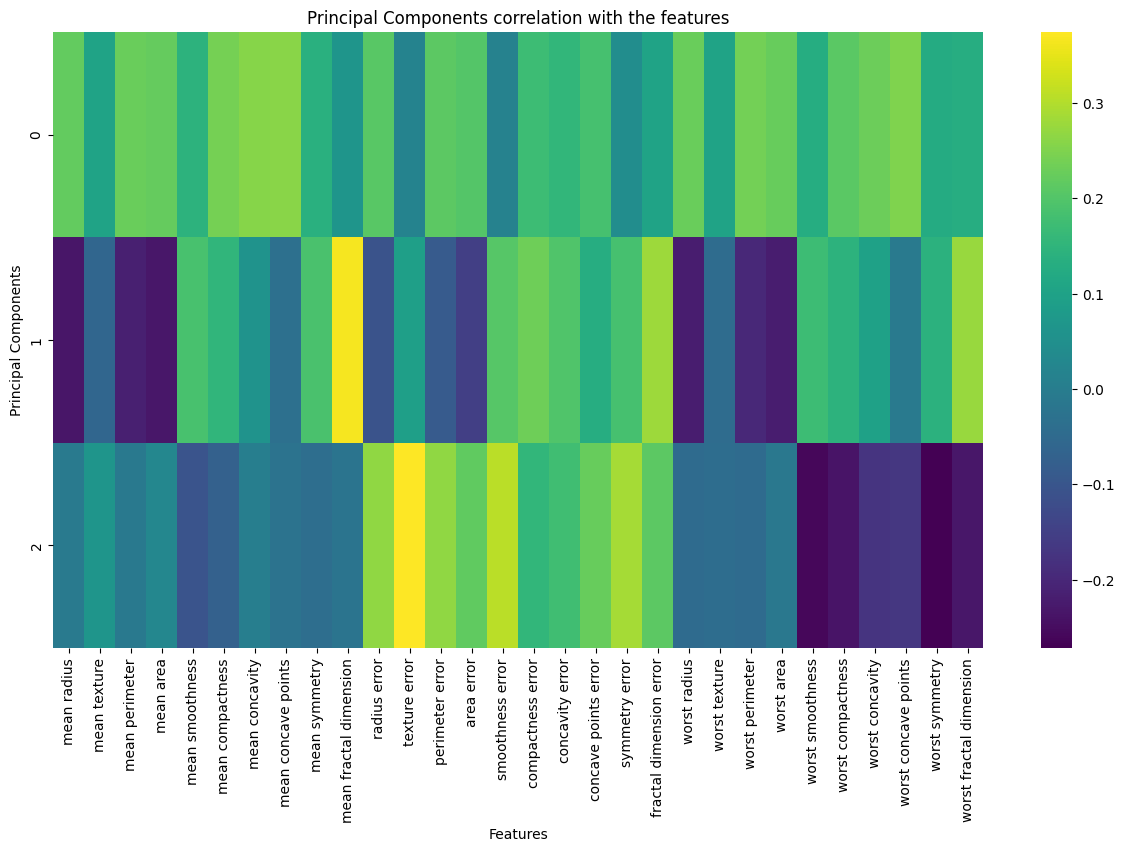

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()